In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense


In [104]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [105]:
data=pd.read_csv("/content/sample_data/adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [106]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [107]:
sal_y=[]
for i in range (len(data['income'])):
    if (data['income'][i]=='<=50K'):
        sal_y.append(0)
    else:
        sal_y.append(1)

In [108]:
data.info

<bound method DataFrame.info of        age workclass  fnlwgt  ... hours.per.week  native.country income
0       90         ?   77053  ...             40   United-States  <=50K
1       82   Private  132870  ...             18   United-States  <=50K
2       66         ?  186061  ...             40   United-States  <=50K
3       54   Private  140359  ...             40   United-States  <=50K
4       41   Private  264663  ...             40   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States  <=50K
32557   27   Private  257302  ...             38   United-States  <=50K
32558   40   Private  154374  ...             40   United-States   >50K
32559   58   Private  151910  ...             40   United-States  <=50K
32560   22   Private  201490  ...             20   United-States  <=50K

[32561 rows x 15 columns]>

In [109]:
sal_y=pd.DataFrame(sal_y)
data1=data.join(sal_y)
data1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,0
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [110]:
df=data
df = df[(df != '?').all(axis=1)] # droped the values (rows) containing ? in it.
dat=df


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

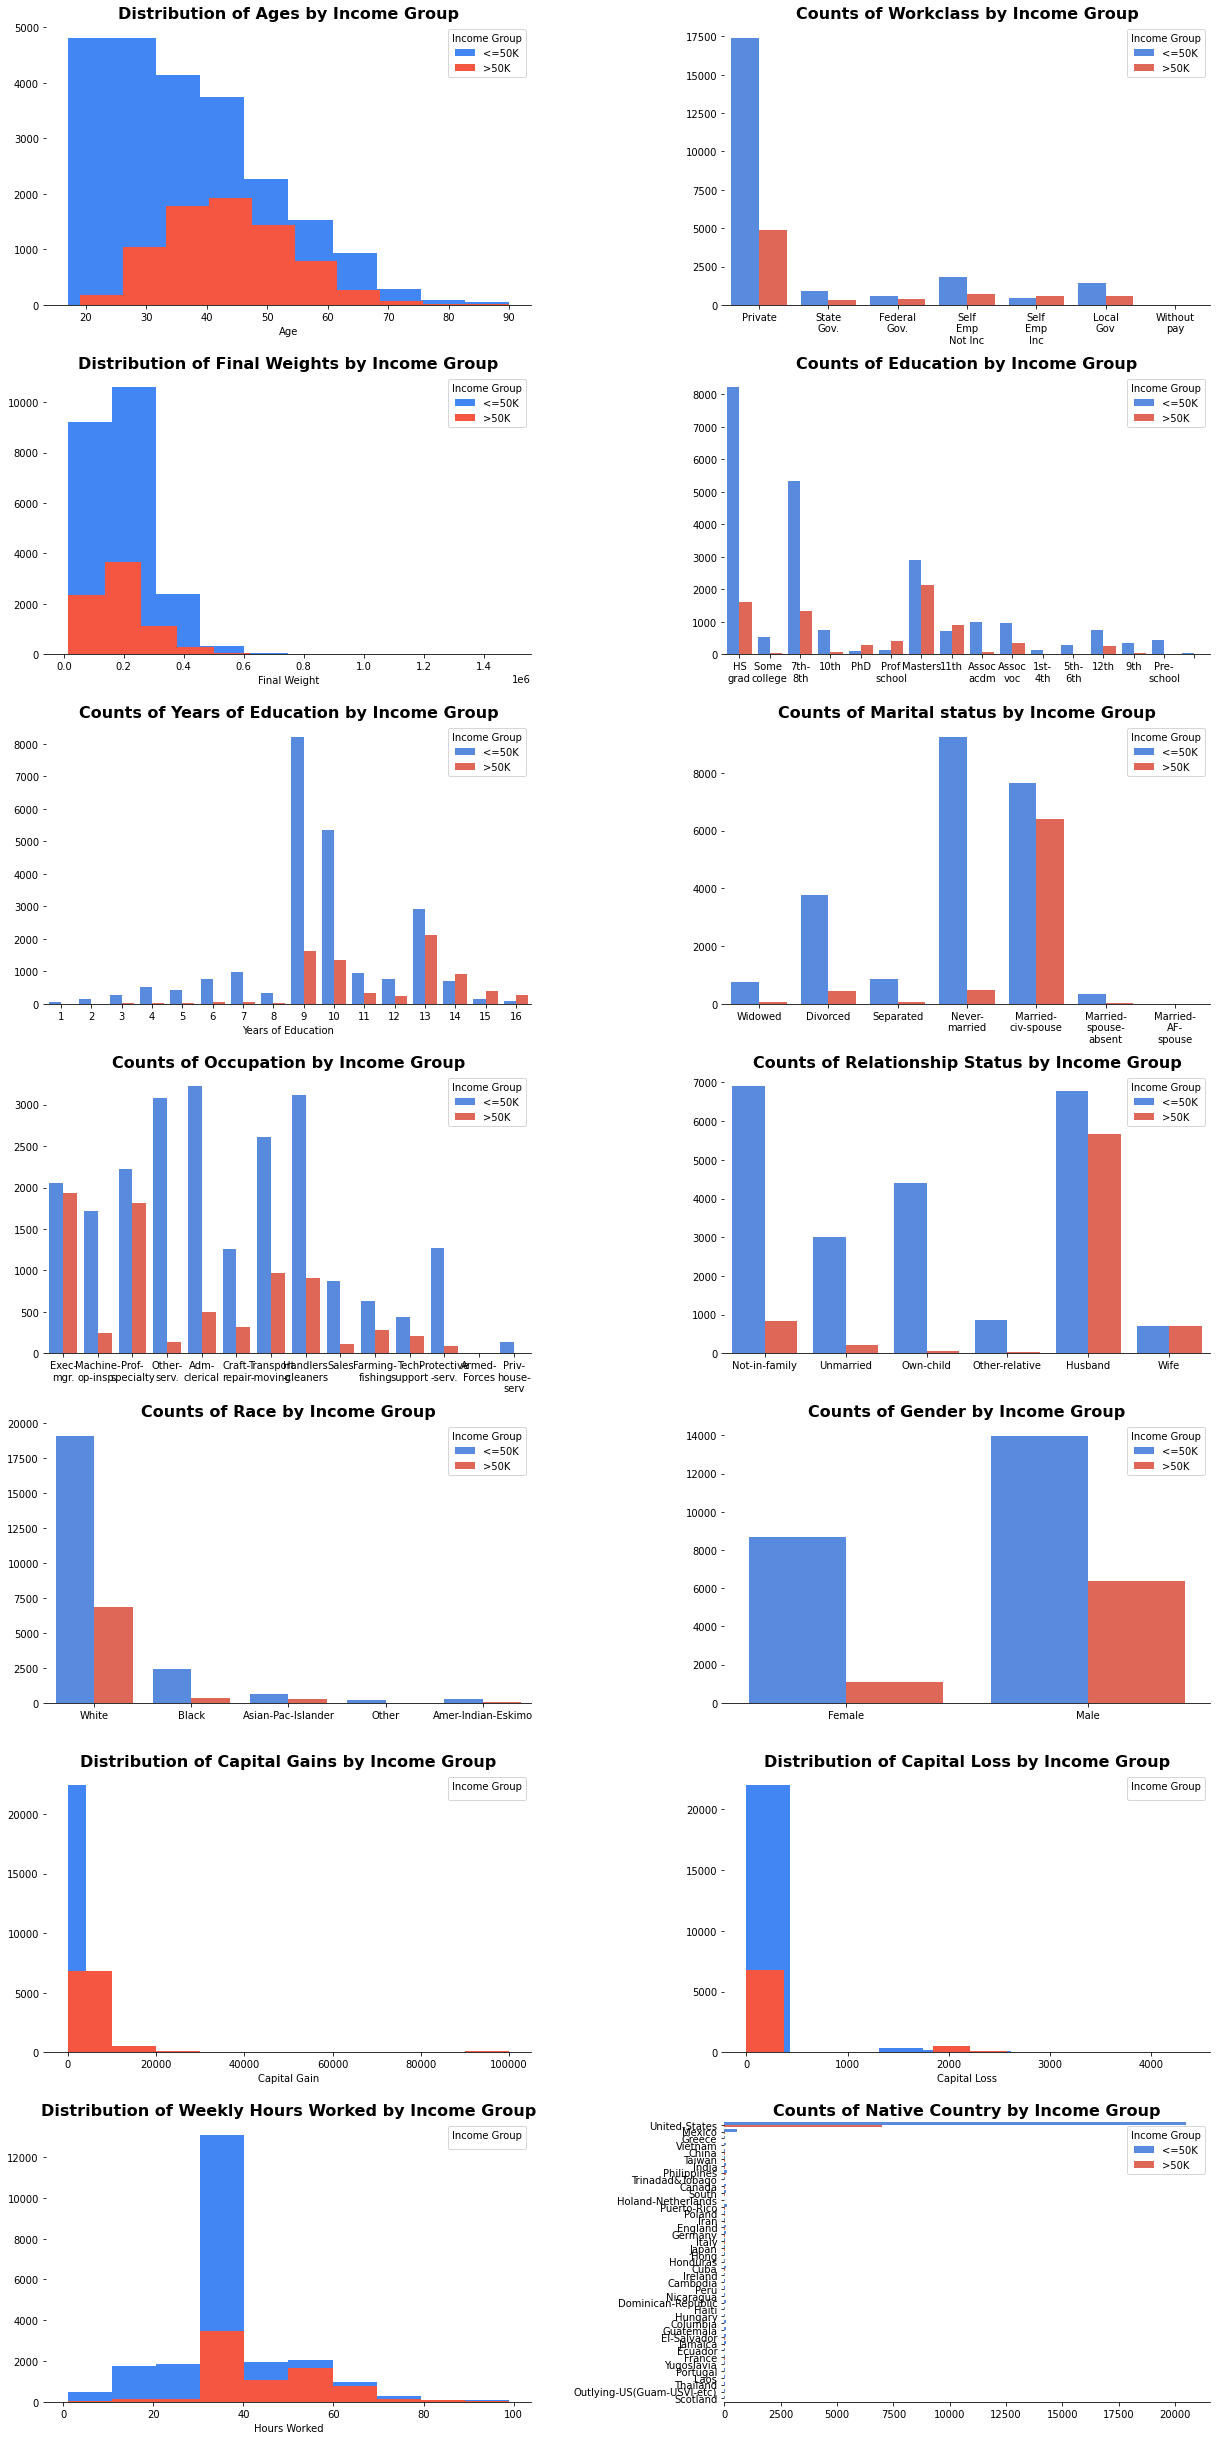

In [111]:
import matplotlib.gridspec as gridspec
import seaborn as sns
gs = gridspec.GridSpec(7,2)
plt.figure(figsize=(17,34))
   
#Age by Income Group
ax = plt.subplot(gs[0,0])
ax.hist(dat.loc[dat['income']=="<=50K", 'age'], color="#4286f4")
ax.hist(dat.loc[dat['income']==">50K", 'age'], color="#f45641")
ax.set_title("Distribution of Ages by Income Group", fontsize=16, fontweight='bold')
ax.legend(['<=50K', '>50K'], title="Income Group")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Age")

#Workclass (binned) by Income Group
ax1 = plt.subplot(gs[0,1])
sns.countplot(dat['workclass'], hue=dat['income'], ax=ax1, palette=['#4286f4', '#f45641'])
ax1.legend(loc='upper right', title="Income Group")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xticklabels(['Private', 'State\nGov.', 'Federal\nGov.', 'Self\nEmp\nNot Inc',
                     'Self\nEmp\nInc', 'Local\nGov', 'Without\npay', 'Never\nworked'])
ax1.set_title('Counts of Workclass by Income Group', fontsize=16, fontweight='bold')
ax1.set_xlabel(""), ax1.set_ylabel("")

#Final Weight by Income Group
ax2 = plt.subplot(gs[1,0])
ax2.hist(dat.loc[dat['income']=="<=50K", 'fnlwgt'], color="#4286f4")
ax2.hist(dat.loc[dat['income']==">50K", 'fnlwgt'], color="#f45641")
ax2.set_title("Distribution of Final Weights by Income Group", fontsize=16, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.legend(['<=50K', '>50K'], title="Income Group")
ax2.set_xlabel("Final Weight")

#Education by Income Group
ax3 = plt.subplot(gs[1,1])
sns.countplot(dat['education'], hue=dat['income'], ax=ax3, palette=['#4286f4', '#f45641'])
ax3.set_xticklabels(['HS\ngrad', 'Some \ncollege', '7th-\n8th', '10th', 'PhD',
                     'Prof\nschool', 'Masters', '11th', 'Assoc\nacdm', 'Assoc\nvoc',
                     '1st-\n4th', '5th-\n6th', '12th', '9th', 'Pre-\nschool'])
ax3.set_xlabel(""), ax3.set_ylabel("")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.legend(loc='upper right', title="Income Group")
ax3.set_title('Counts of Education by Income Group', fontsize=16, fontweight='bold')

#Education num by Income Group
ax4 = plt.subplot(gs[2,0])
sns.countplot(dat['education.num'], hue=dat['income'], ax=ax4, palette=['#4286f4', '#f45641'])
ax4.set_xlabel('Years of Education'), ax4.set_ylabel("")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.set_title("Counts of Years of Education by Income Group", fontsize=16, fontweight='bold')
ax4.legend(title="Income Group")

#Marital status by Income Group
ax5 = plt.subplot(gs[2,1])
sns.countplot(dat['marital.status'], hue=dat['income'], ax=ax5, palette=['#4286f4', '#f45641'])
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.set_ylabel(""), ax5.set_xlabel("")
ax5.set_xticklabels(['Widowed', 'Divorced', 'Separated', 'Never-\nmarried',
                     'Married-\nciv-spouse', 'Married-\nspouse-\nabsent',
                     'Married-\nAF-\nspouse'])
ax5.legend(title="Income Group")
ax5.set_title("Counts of Marital status by Income Group", fontsize=16, fontweight='bold')

#Occupation by Income Group
ax6 = plt.subplot(gs[3,0])
sns.countplot(dat['occupation'], hue=dat['income'], ax=ax6, palette=['#4286f4', '#f45641'])
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.set_ylabel(""), ax6.set_xlabel("")
ax6.set_xticklabels(['Exec-\nmgr.', 'Machine-\nop-insp.', 'Prof-\nspecialty',
                     'Other-\nserv.', 'Adm-\nclerical', 'Craft-\nrepair', 
                     'Transport\n-moving', 'Handlers\n-cleaners', 'Sales', 'Farming-\nfishing',
                     'Tech-\nsupport', 'Protective\n-serv.', 'Armed-\nForces', 
                     'Priv-\nhouse-\nserv'])
ax6.legend(title="Income Group")
ax6.set_title("Counts of Occupation by Income Group", fontsize=16, fontweight='bold')

#Relationship by Income Group
ax7 = plt.subplot(gs[3,1])
sns.countplot(dat['relationship'], hue=dat['income'], ax=ax7, palette=['#4286f4', '#f45641'])
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.set_ylabel(""), ax7.set_xlabel("")
ax7.legend(title="Income Group")
ax7.set_title("Counts of Relationship Status by Income Group", fontsize=16, fontweight='bold')

#Race by Income Group
ax8 = plt.subplot(gs[4,0])
sns.countplot(dat['race'], hue=dat['income'], ax=ax8, palette=['#4286f4', '#f45641'])
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.set_ylabel(""), ax8.set_xlabel("")
ax8.legend(title="Income Group")
ax8.set_title("Counts of Race by Income Group", fontsize=16, fontweight='bold')

#Sex by Income Group
ax9 = plt.subplot(gs[4,1])
sns.countplot(dat['sex'], hue=dat['income'], ax=ax9, palette=['#4286f4', '#f45641'])
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.set_ylabel(""), ax9.set_xlabel("")
ax9.legend(title="Income Group")
ax9.set_title("Counts of Gender by Income Group", fontsize=16, fontweight='bold')

#Capital Gain by Income Group
ax10 = plt.subplot(gs[5,0])
ax10.hist(dat.loc[dat['income']=="<=50K", 'capital.gain'], color="#4286f4")
ax10.hist(dat.loc[dat['income']==">50K", 'capital.gain'], color="#f45641")
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.spines['left'].set_visible(False)
ax10.set_ylabel(""), ax10.set_xlabel("Capital Gain")
ax10.legend(title="Income Group")
ax10.set_title('Distribution of Capital Gains by Income Group', fontsize=16, fontweight='bold')

#Capital Loss by Income Group
ax11 = plt.subplot(gs[5,1])
ax11.hist(dat.loc[dat['income']=="<=50K", 'capital.loss'], color="#4286f4")
ax11.hist(dat.loc[dat['income']==">50K", 'capital.loss'], color="#f45641")
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)
ax11.spines['left'].set_visible(False)
ax11.set_ylabel(""), ax11.set_xlabel("Capital Loss")
ax11.legend(title="Income Group")
ax11.set_title('Distribution of Capital Loss by Income Group', fontsize=16, fontweight='bold')

#Hours per week by Income Group
ax12 = plt.subplot(gs[6,0])
ax12.hist(dat.loc[dat['income']=="<=50K", 'hours.per.week'], color="#4286f4")
ax12.hist(dat.loc[dat['income']==">50K", 'hours.per.week'], color="#f45641")
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax12.spines['left'].set_visible(False)
ax12.set_ylabel(""), ax12.set_xlabel("Hours Worked")
ax12.legend(title="Income Group")
ax12.set_title('Distribution of Weekly Hours Worked by Income Group', 
               fontsize=16, fontweight='bold')

#Native country by Income Group
ax13 = plt.subplot(gs[6,1])
sns.countplot(y=dat['native.country'], hue=dat['income'], ax=ax13, palette=['#4286f4', 
                                                                            '#f45641'])
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
ax13.spines['left'].set_visible(False)
ax13.set_ylabel(""), ax13.set_xlabel("")
ax13.legend(title="Income Group")
ax13.set_title("Counts of Native Country by Income Group", fontsize=16, fontweight='bold')

plt.tight_layout();

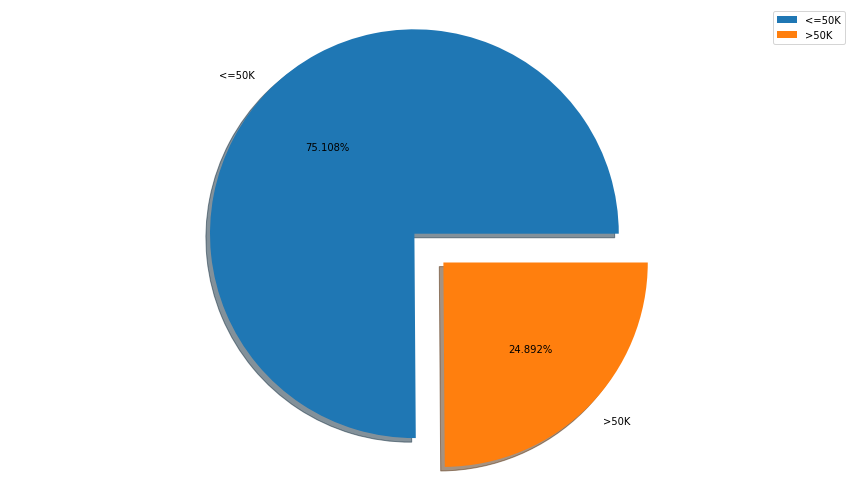

In [112]:
#plot for checking ratio between >=50K and <50K people
explode = (0.2,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['income'].value_counts(), explode=explode,labels=['<=50K','>50K'], autopct='%1.3f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Scatter plot of hours per week vs age')

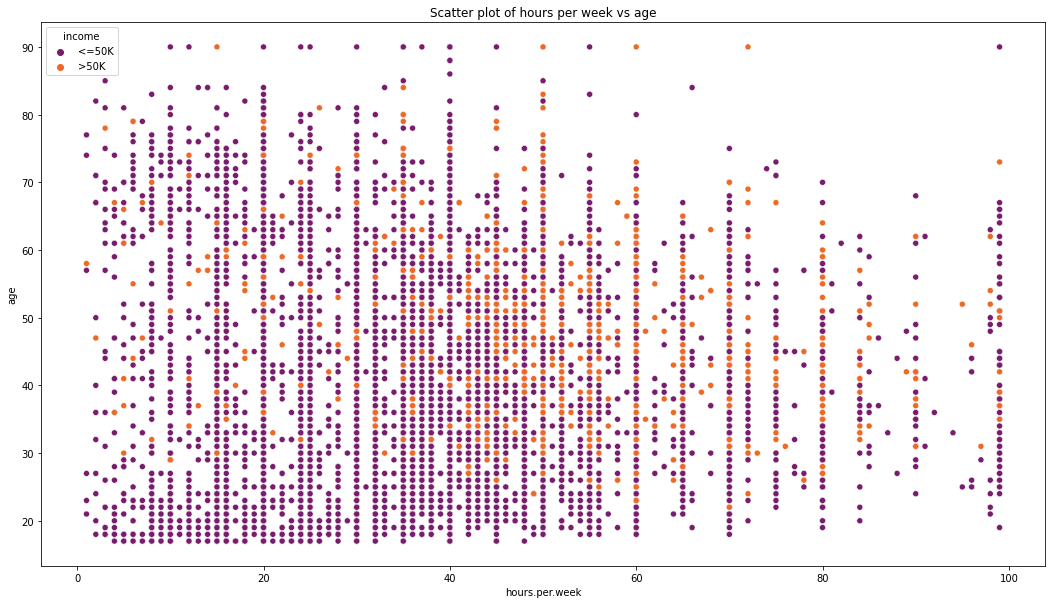

In [113]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='hours.per.week',y='age',data=df,palette='inferno', hue = 'income')
plt.title('Scatter plot of hours per week vs age')

Text(0.5, 1.0, 'Overall distribution of age comparing income')

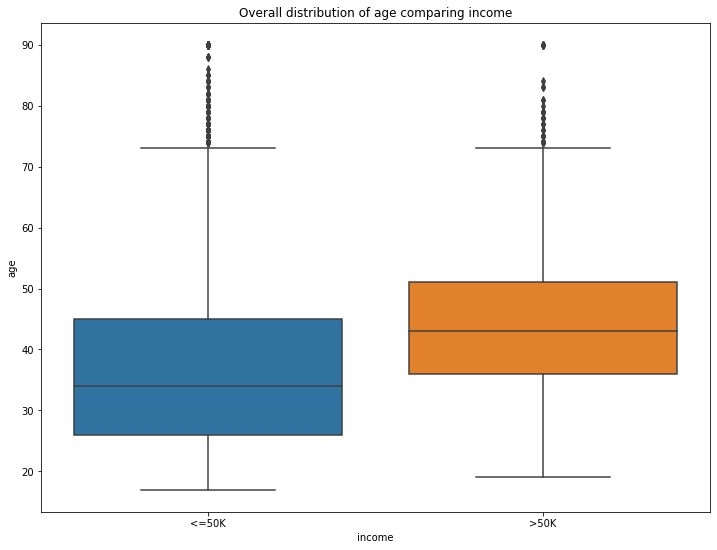

In [114]:
plt.figure(figsize=(12,9))
sns.boxplot(x='income',y='age',data=df)
plt.title("Overall distribution of age comparing income")

### Using Logistic Regression for solving the dataset

In [115]:
#Convert 'income' to indicator variable:
income_dummies = pd.get_dummies(dat['income'], prefix='income', drop_first=True)
dat = pd.concat([dat, income_dummies], axis=1)
del dat['income']

#Native.country:

#Convert value from non United States country to 'Not United States'
dat.loc[(dat['native.country']!='United-States') & (dat['native.country'].notnull()), 
        'native.country']='Not United States'

country_dummies = pd.get_dummies(dat['native.country'], prefix='origin_country', 
                                 drop_first=True,
                                dummy_na=True)

dat = pd.concat([dat, country_dummies], axis=1)
del dat['native.country']

#Capital gain/loss: Binned into 0 if capital loss == 0, 1 otherwise. Same for capital gain

dat.loc[dat['capital.loss']>0, 'capital.loss'] = 1
dat.loc[dat['capital.gain']>0, 'capital.gain'] = 1

#Sex:

sex_dummies = pd.get_dummies(dat['sex'], prefix='gender', drop_first=True)
dat = pd.concat([dat, sex_dummies], axis=1)
del dat['sex']

#Race: Binned into White/Non-White:

race_dict = {'Black': 'non_White', 'Asian-Pac-Islander': 'non_White',
             'Other': 'non_White', 'Amer-Indian-Eskimo': 'non_White'}

race_dummies = pd.get_dummies(dat['race'].replace(race_dict.keys(), race_dict.values()),
                              prefix='race', drop_first=True)
dat = pd.concat([dat, race_dummies], axis=1)
del dat['race']

#Occupation: Armed Forces binned with Protective-Service bc only 9 in the military. 

occupy_dict = {'Armed-Forces': 'Protective-serv-Military', 'Protective-serv': 
               'Protective-serv-Military'}

occupy_dummies = pd.get_dummies(dat['occupation'].replace(occupy_dict.keys(),
                                                          occupy_dict.values()),
                                                          prefix='occupation', drop_first=True,
                                                          dummy_na=True)
dat = pd.concat([dat, occupy_dummies], axis=1)
del dat['occupation']

#Marital Status: married subgroups binned into one group 'married':

married_dict = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married',
                'Married-AF-spouse': 'Married'}

marital_dummies = pd.get_dummies(dat['marital.status'].replace(married_dict.keys(),
                                                               married_dict.values()),
                                                               prefix='marital_status',
                                                               drop_first=True)
dat = pd.concat([dat, marital_dummies], axis=1)
del dat['marital.status']

#education: binned

education_dict = {'1st-4th': 'Grade-school', '5th-6th': 'Grade-school', '7th-8th': 
                  'Junior-high', '9th': 'HS-nongrad', '10th': 'HS-nongrad', 
                  '11th': 'HS-nongrad', '12th': 'HS-nongrad', 'Masters': 
                  'Graduate', 'Doctorate': 'Graduate', 'Preschool': 'Grade-school'}

educ_dummies = pd.get_dummies(dat.education.replace(education_dict.keys(), 
                                                    education_dict.values()),
                                                    prefix='education',
                                                    drop_first=True)
                              
dat = pd.concat([dat, educ_dummies], axis=1)
del dat['education']

#workclass:

#Those who have a workclass of 'never worked' or 'without pay' will be dropped as we want to
#focus our attention on wage earners:

dat.drop(dat.loc[(dat.workclass=='Without-pay') | (dat.workclass=='Never-worked'), :].index,
        inplace=True)

class_dict = {'Local-gov': 'Government', 'State-gov': 'Government', 'Federal-gov': 'Government',
              'Self-emp-not-inc': 'Self-employed', 'Self-emp-inc': 'Self-employed'}

class_dummies= pd.get_dummies(dat.workclass.replace(class_dict.keys(), class_dict.values()),
                              prefix='workclass', drop_first=True, dummy_na=True)

dat = pd.concat([dat, class_dummies], axis=1)
del dat['workclass']

#relationship: not sure what this variable is about but with just a few levels, I will 
#create a set of dummies for all of them

relate_dummies = pd.get_dummies(dat.relationship, prefix='relationship', drop_first=True)

dat = pd.concat([dat, relate_dummies], axis=1)
del dat['relationship']


#Age

#applying a log transformation on age to maintain its interpretability and 
#make variable's scale closer to values of indicator variables.

dat['age'] = np.log10(dat['age'])

#fnlwgt: not quite sure the purpose of this variable with this data but holding
#on to it at least until we build baseline. Going to transform it to log scale

dat['fnlwgt'] = np.log10(dat['fnlwgt'])

#hours worked will be binned. 35-40hrs will be 'full-time'; <35 will be part-time;
#>40 will be '40+hrs'

dat['hours.worked'] = np.nan
dat.loc[(dat['hours.per.week']>=35) | (dat['hours.per.week']<=40), 'hours.worked'] = 'Full_time'
dat.loc[dat['hours.per.week']<35, 'hours.worked'] = 'Part_time'
dat.loc[dat['hours.per.week']>40, 'hours.worked'] = '40+hrs'

hours_dummies = pd.get_dummies(dat['hours.worked'], prefix='WklyHrs', drop_first=True)

dat = pd.concat([dat, hours_dummies], axis=1)

del dat['hours.per.week']
del dat['hours.worked']

#Education num will be binned in 4 year increments

educ_dict = {1: '1-4', 2: '1-4', 3: '1-4', 4: '1-4', 5: '5-8', 6: '5-8',
             7: '5-8', 8: '5-8', 9: '9-12', 10: '9-12', 11: '9-12', 12: '9-12',
             13: '13-16', 14: '13-16', 15: '13-16', 16: '13-16'}

educ_num = pd.get_dummies(dat['education.num'].replace(educ_dict.keys(), educ_dict.values()),
                          prefix='YrsEduc', drop_first=False)

dat = pd.concat([dat, educ_num], axis=1)

del dat['education.num']

In [116]:
#Splitting data into a training and test set (test set = 33% of data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat.loc[:, dat.columns != 'income_>50K'],
                                                    dat.loc[:, 'income_>50K'], test_size=.33,
                                                    random_state=1234)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [117]:
print(scores.mean())

0.8382590636478209


In [118]:
base_log = LogisticRegression()
base_log.fit(X_train, y_train)
base_preds = base_log.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x=(accuracy_score(y_test, base_preds))

In [120]:
print('Logistic Regression : %.2f percent.' % (round(x*100,3)))


Logistic Regression : 84.44 percent.


In [121]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7489
           1       0.73      0.60      0.65      2460

    accuracy                           0.84      9949
   macro avg       0.80      0.76      0.78      9949
weighted avg       0.84      0.84      0.84      9949



## Using ANN for solving the dataset

In [123]:
# Label encoding the dataset attributes


df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
#Encoding the features
from sklearn.preprocessing import LabelEncoder
#workclass
labelencoder_workclass = LabelEncoder()
df.workclass = labelencoder_workclass.fit_transform(df.workclass)
#education
labelencoder_education = LabelEncoder()
df.education = labelencoder_education.fit_transform(df.education)
#occupation
labelencoder_occupation = LabelEncoder()
df.occupation = labelencoder_occupation.fit_transform(df.occupation)
#race
labelencoder_race = LabelEncoder()
df.race = labelencoder_race.fit_transform(df.race)
#sex
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [124]:
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].map({"Married":0, "Single":1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [125]:
df['native.country'] = df['native.country'].map({'Puerto-Rico':0,'Haiti':1,'Cuba':2, 'Iran':3,
                                      'Honduras':4, 'Jamaica':5, 'Vietnam':6, 'Mexico':7, 'Dominican-Republic':8,
                                       'Laos':9, 'Ecuador':10, 'El-Salvador':11, 'Cambodia':12, 'Columbia':13,
                                         'Guatemala':14, 'South':15, 'India':16, 'Nicaragua':17, 'Yugoslavia':18, 
                                         'Philippines':19, 'Thailand':20, 'Trinadad&Tobago':21, 'Peru':22, 'Poland':23, 
                                         'China':24, 'Hungary':25, 'Greece':26, 'Taiwan':27, 'Italy':28, 'Portugal':29, 
                                         'France':30, 'Hong':31, 'England':32, 'Scotland':33, 'Ireland':34, 
                                         'Holand-Netherlands':35, 'Canada':36, 'Germany':37, 'Japan':38, 
                                         'Outlying-US(Guam-USVI-etc)':39, 'United-States':40
                                        })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [126]:
df = df.drop('relationship',axis=1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,1,3,4,0,0,4356,18,40,0
3,54,2,140359,5,4,1,6,4,0,0,3900,40,40,0
4,41,2,264663,15,10,1,9,4,0,0,3900,40,40,0
5,34,2,216864,11,9,1,7,4,0,0,3770,45,40,0
6,38,2,150601,0,6,1,0,4,1,0,3770,40,40,0


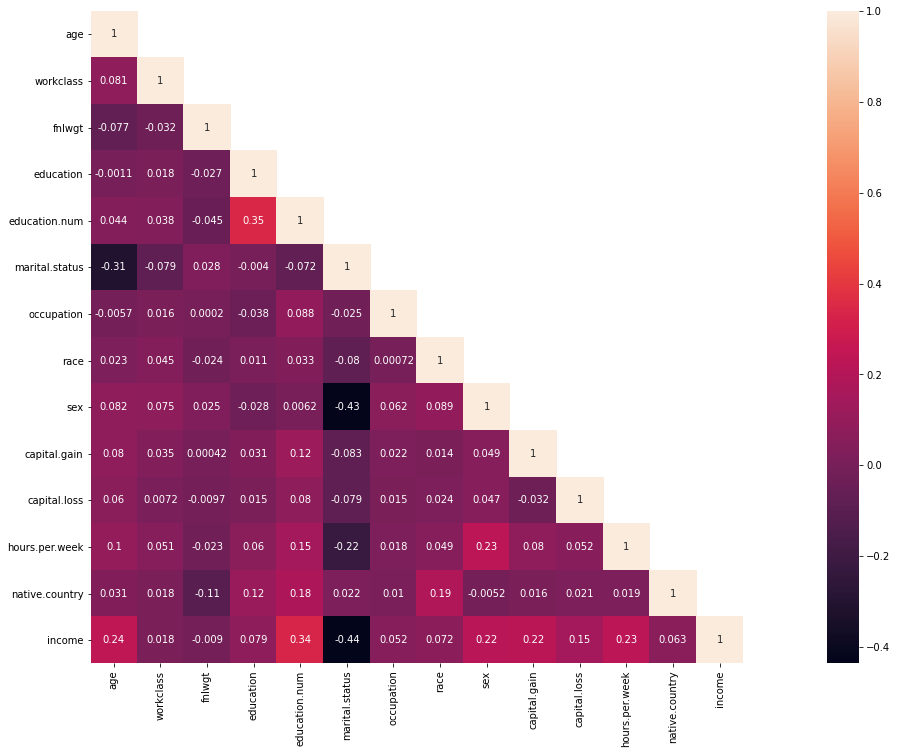

In [127]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [128]:
X = df.drop('income',axis=1).values
y = df['income'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [131]:
classifier = Sequential()
#classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 13))

In [132]:
classifier.add(Dense(units = 8, activation = 'relu', input_dim = 13))

In [133]:
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

In [134]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [135]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [136]:
classifier.fit(X_train, y_train, batch_size=32,epochs = 50,verbose = 1)

Epoch 1/50
755/755 [==============================] - 2s 1ms/step - loss: 0.5258 - accuracy: 0.7557
Epoch 2/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3698 - accuracy: 0.8316
Epoch 3/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8397
Epoch 4/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3495 - accuracy: 0.8409
Epoch 5/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3448 - accuracy: 0.8426
Epoch 6/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8455
Epoch 7/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.8430
Epoch 8/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3338 - accuracy: 0.8473
Epoch 9/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3390 - accuracy: 0.8464
Epoch 10/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8457

In [137]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5, 257.44, 'Predicted label')

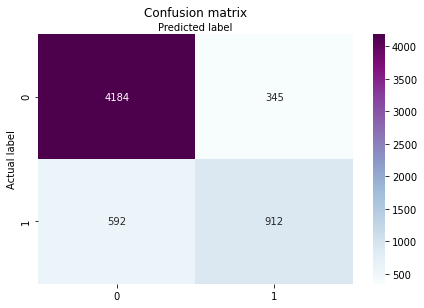

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [139]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8446875517984419


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4529
           1       0.73      0.61      0.66      1504

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033

